# PROJETO DE MESTRADO

### 0.2. Importando bibliotecas

In [39]:
import pandas as pd  # para gerar os DataFrames (tabelas)
from IPython.display import display  # para apresentar os dados no Notebook de forma mais agradável 
import dtale  # para gerar perfil dos dados (descrever os dados)
import folium  # para plotar os pontos geolocalizados no mapa
import fontawesome  # para utilizar imagens como font
#import tensorflow-gpu as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential  # tipo de modelo
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation, Input  #, DepthwiseConv1D, GlobalMaxPooling1D  # camadas utilizadas nos modelos
from sklearn.preprocessing import MinMaxScaler  # normalizador
import numpy as np  # séries de dados
import matplotlib.pyplot as plt  # para visualização dos dados em gráficos
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint  # funções para utilizar nos callbacks
# durante os treinamentos dos modelos.
from sklearn.model_selection import train_test_split  # para dividir os dados em treinamento e teste
from scipy.spatial.distance import cdist  # para cálculo da distância euclidiana
from keras.metrics import mean_absolute_error  # para cálculo do mean_absolute_error após ajustes das predições
from tensorflow.keras.optimizers import AdamW  # otimizador específico. AdamW optimization is a stochastic gradient descent method 
# that is based on adaptive estimation of first-order and second-order moments with an added method to decay weights
from tensorflow.keras.initializers import glorot_uniform  # método de inicialização Xavier ou Glorot. 
# A inicialização de Xavier é uma escolha comum para a inicialização de pesos, pois ajuda a evitar problemas de treinamento, 
# como gradientes que explodem ou desaparecem. Ela é especialmente útil em redes neurais profundas e redes recorrentes, 
# como as LSTMs. 
# Importando funções de outros notebooks


# Gráficos Extras

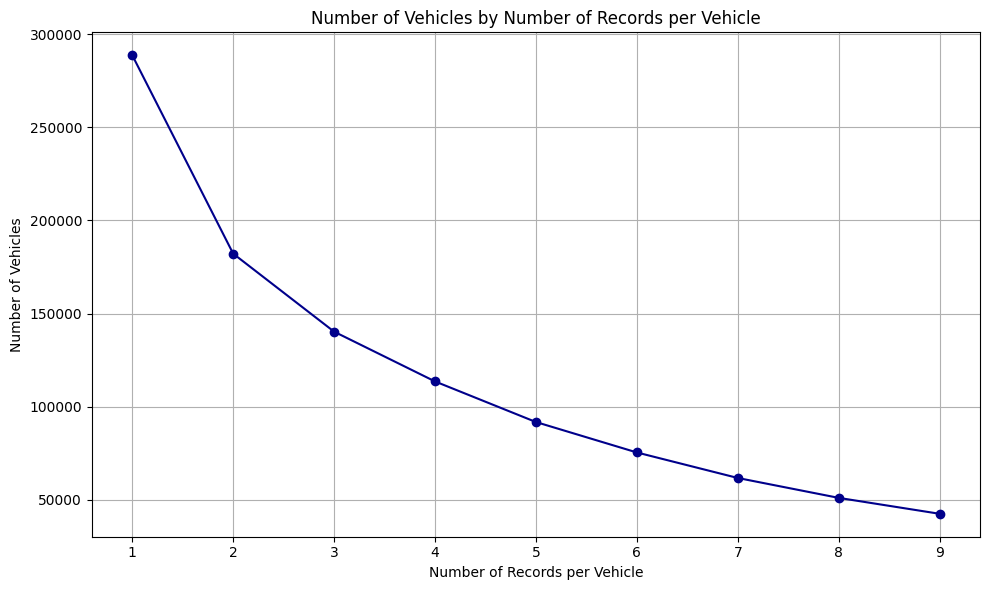

In [44]:
import matplotlib.pyplot as plt

# Data provided
x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y_values = [288656, 182183, 140323, 113617, 91829, 75499, 61807, 51132, 42588]

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='darkblue')
         #, color='#3274A1')

# Title and labels
plt.title('Number of Vehicles by Number of Records per Vehicle')
plt.xlabel('Number of Records per Vehicle')
plt.ylabel('Number of Vehicles')

plt.grid(True)
plt.xticks(x_values)  # Ensure all x-values are marked
plt.tight_layout()
plt.show()


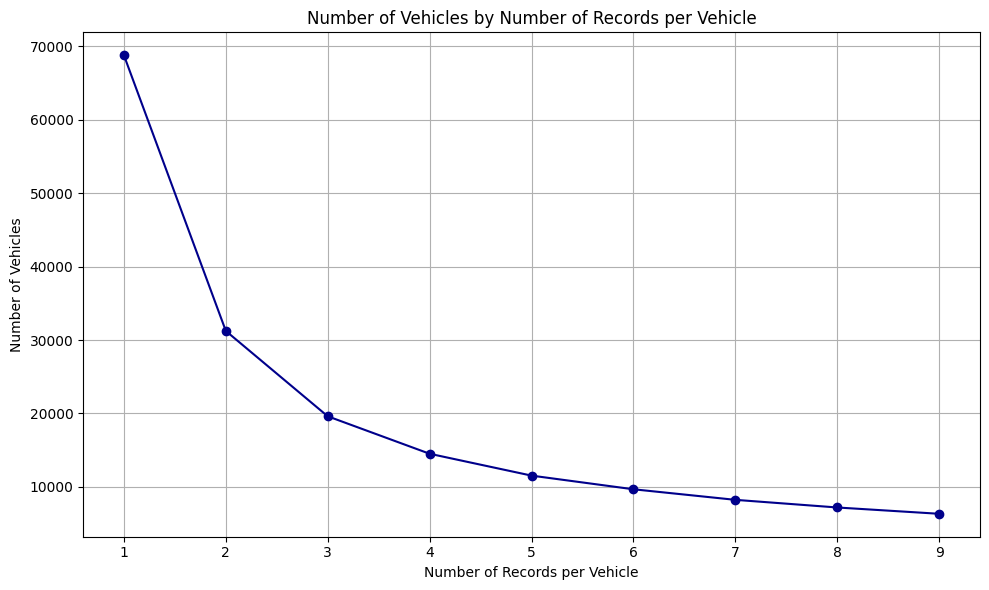

In [45]:
import matplotlib.pyplot as plt

# Data provided
x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y_values = [68786, 31234, 19609, 14506, 11528, 9668, 8229, 7188, 6329]

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='darkblue')
         #, color='#3274A1')

# Title and labels
plt.title('Number of Vehicles by Number of Records per Vehicle')
plt.xlabel('Number of Records per Vehicle')
plt.ylabel('Number of Vehicles')

plt.grid(True)
plt.xticks(x_values)  # Ensure all x-values are marked
plt.tight_layout()
plt.show()


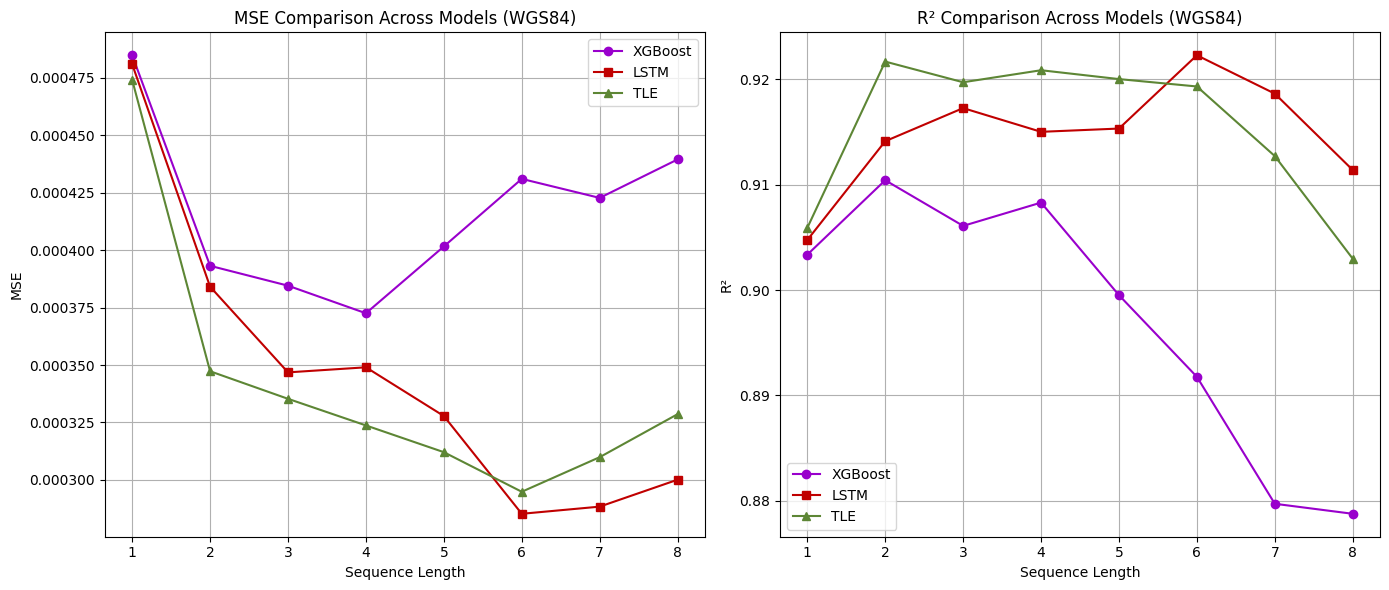

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Data for sequence length and models
'''sequence_length = np.array([1, 2, 3, 4, 5, 6, 7])
xgboost_mse = np.array([0.000484802, 0.000393166, 0.000384519, 0.000372517, 0.000401591, 0.0004310, 0.000422721])
lstm_mse = np.array([0.000480911, 0.000384079, 0.000346793, 0.0003490, 0.000327796, 0.000285243, 0.000288358])
tle_mse = np.array([0.000474076, 0.000347274, 0.000335284, 0.0003237, 0.00031206, 0.000294832, 0.000309884])

xgboost_r2 = np.array([0.90335, 0.91041, 0.90608, 0.90829, 0.89951, 0.89177, 0.87973])
lstm_r2 = np.array([0.90474, 0.91411, 0.91725, 0.9150, 0.91531, 0.92226, 0.91862])
tle_r2 = np.array([0.90589, 0.92166, 0.9197, 0.92084, 0.92, 0.9193, 0.9127])
'''

sequence_length = np.array([1, 2, 3, 4, 5, 6, 7, 8])
xgboost_mse = np.array([0.000484802, 0.000393166, 0.000384519, 0.000372517, 0.000401591, 0.0004310, 0.000422721, 0.000439466])
lstm_mse = np.array([0.000480911, 0.000384079, 0.000346793, 0.0003490, 0.000327796, 0.000285243, 0.000288358, 0.000300085])
tle_mse = np.array([0.000474076, 0.000347274, 0.000335284, 0.0003237, 0.00031206, 0.000294832, 0.000309884, 0.000328602])

xgboost_r2 = np.array([0.90335, 0.91041, 0.90608, 0.90829, 0.89951, 0.89177, 0.87973, 0.87878])
lstm_r2 = np.array([0.90474, 0.91411, 0.91725, 0.9150, 0.91531, 0.92226, 0.91862, 0.91138])
tle_r2 = np.array([0.90589, 0.92166, 0.9197, 0.92084, 0.92, 0.9193, 0.9127, 0.90297])



# Color definitions
#new_lstm_color = '#3274A1'  # Blue from the bar chart
#new_tle_color = '#E1812C'   # Orange from the bar chart
#royal_purple = '#7851A9'    # Selected Royal Purple

new_lstm_color = '#C00000'  # Blue from the bar chart
new_tle_color = '#5D8635'   # Orange from the bar chart
royal_purple = '#9900CC'    # Selected Royal Purple

# Plotting with the chosen colors and markers
plt.figure(figsize=(14, 6))

# MSE plot with specified colors
### supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt.subplot(1, 2, 1)
plt.plot(sequence_length, xgboost_mse, marker='o', linestyle='-', color=royal_purple, label='XGBoost')
plt.plot(sequence_length, lstm_mse, marker='s', linestyle='-', color=new_lstm_color, label='LSTM')
plt.plot(sequence_length, tle_mse, marker='^', linestyle='-', color=new_tle_color, label='TLE')
plt.title('MSE Comparison Across Models (WGS84)')
plt.xlabel('Sequence Length')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# R² plot with specified colors
### supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt.subplot(1, 2, 2)
plt.plot(sequence_length, xgboost_r2, marker='o', linestyle='-', color=royal_purple, label='XGBoost')
plt.plot(sequence_length, lstm_r2, marker='s', linestyle='-', color=new_lstm_color, label='LSTM')
plt.plot(sequence_length, tle_r2, marker='^', linestyle='-', color=new_tle_color, label='TLE')
plt.title('R² Comparison Across Models (WGS84)')
plt.xlabel('Sequence Length')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


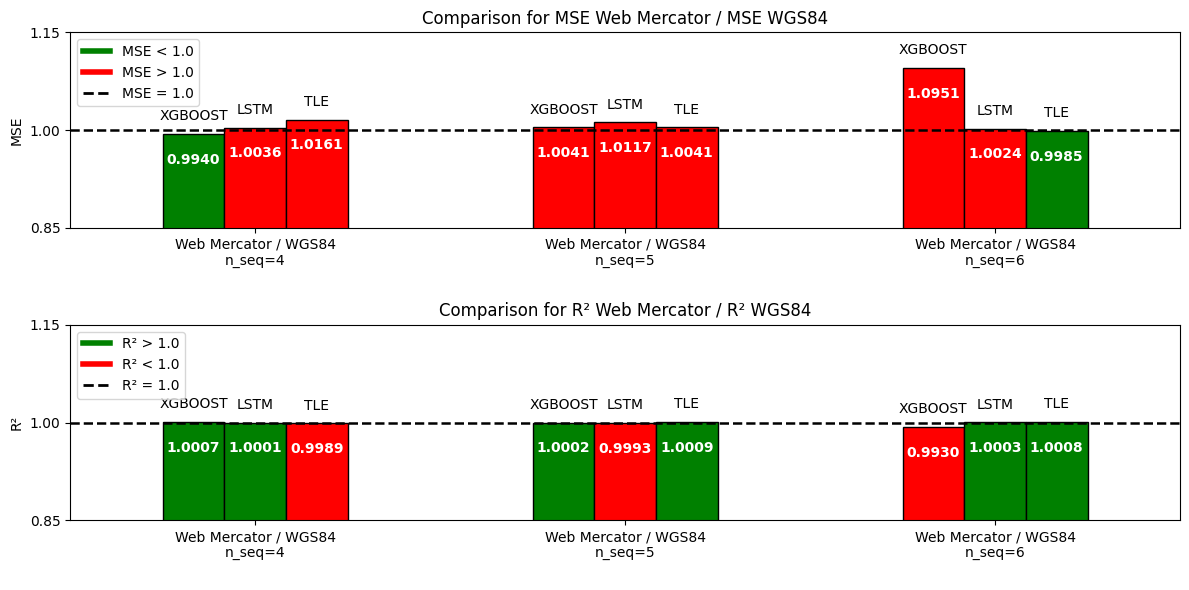

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the image
data_bar = {
    "Geolocation": ["Web Mercator / WGS84", "Web Mercator / WGS84", "Web Mercator / WGS84", 
                    "UTM / WGS84", "UTM / WGS84", "UTM / WGS84", 
                    "UTM / Web Mercator", "UTM / Web Mercator", "UTM / Web Mercator"],
    "Sequence Length": [4, 5, 6, 
                        4, 5, 6, 
                        4, 5, 6],
    "XGBOOST_MSE": [0.9940054, 1.004089101, 1.095070604, 
                    0.9630129, 0.933324058, 0.988206442, 
                    0.9688205, 0.929523144, 0.90241345],
    "XGBOOST_R2": [1.0007, 1.000159207, 0.992987037, 
                   1.0015, 1.003653375, 1.0001403, 
                   1.0008, 1.003493612, 1.007203783],
    "LSTM_MSE": [1.0036207, 1.011675811, 1.002366419, 
                 0.9769478, 0.977279649, 0.972487406, 
                 0.9734234, 0.966000805, 0.970191526],
    "LSTM_R2": [1.0001, 0.999333632, 1.000317982, 
                1.0005, 1.000851517, 1.001055716, 
                1.0005, 1.001518897, 1.000737499],
    "TLE_MSE": [1.0160543, 1.004074077, 0.998515894, 
                0.9723658, 1.04825632, 1.002465761, 
                0.9570018, 1.044002971, 1.003955738],
    "TLE_R2": [0.9989, 1.000867113, 1.000792685, 
               1.0009, 0.993223766, 0.999492128, 
               1.0021, 0.992363275, 0.998700473],
}

df_bar = pd.DataFrame(data_bar)

# Update the labels to include the sequence length with a line break
df_bar["Geolocation_Seq"] = df_bar["Geolocation"] + "\nn_seq=" + df_bar["Sequence Length"].astype(str)

# Filter data for WebMercator / LatLong
df_webmercator_latlong = df_bar[df_bar["Geolocation"] == "Web Mercator / WGS84"]

# Function to color bars, add labels, and create a custom legend
def color_bars_with_full_legend(ax, rects, labels, values, is_mse=True):
    for rect, label, value in zip(rects, labels, values):
        height = rect.get_height()
        x_pos = rect.get_x() + rect.get_width() / 2
        color = 'green' if (value < 1.0 if is_mse else value > 1.0) else 'red'
        rect.set_facecolor(color)
        rect.set_edgecolor('black')
        ax.annotate(label, xy=(x_pos, height + 0.01), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
        ax.annotate(f"{value:.4f}", xy=(x_pos, height - 0.05), ha='center', va='bottom', fontsize=10, color='white', weight='bold')

plt.figure(figsize=(12, 6))

# MSE Bar Plot for WebMercator / LatLong
ax1 = plt.subplot(2, 1, 1)
rects1 = df_webmercator_latlong.plot(x="Geolocation_Seq", y=["XGBOOST_MSE", "LSTM_MSE", "TLE_MSE"], kind="bar", ax=ax1).patches
plt.title("Comparison for MSE Web Mercator / MSE WGS84")
#plt.xlabel("Geolocation / Sequence Length")
plt.xlabel(" ")
plt.ylabel("MSE")
plt.ylim(0.85, 1.15)
plt.yticks(np.arange(0.85, 1.16, 0.15))
# Dashed line and corresponding label for MSE
plt.axhline(y=1.00, color='black', linewidth=1.8, linestyle='--')
plt.xticks(rotation=0)
#plt.grid(True)
plt.grid(False)  # Disable grid
color_bars_with_full_legend(ax1, rects1, ["XGBOOST"]*3 + ["LSTM"]*3 + ["TLE"]*3, df_webmercator_latlong[["XGBOOST_MSE", "LSTM_MSE", "TLE_MSE"]].values.ravel(order='F'), is_mse=True)
# Custom legend for MSE plot including the dashed line
ax1.legend(handles=[
    plt.Line2D([0], [0], color='green', lw=4, label='MSE < 1.0'),
    plt.Line2D([0], [0], color='red', lw=4, label='MSE > 1.0'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label='MSE = 1.0')
], loc='upper left')

# R² Bar Plot for WebMercator / LatLong
ax2 = plt.subplot(2, 1, 2)
rects2 = df_webmercator_latlong.plot(x="Geolocation_Seq", y=["XGBOOST_R2", "LSTM_R2", "TLE_R2"], kind="bar", ax=ax2).patches
plt.title("Comparison for R² Web Mercator / R² WGS84")
#plt.xlabel("Geolocation / Sequence Length")
plt.xlabel(" ")
plt.ylabel("R²")
plt.ylim(0.85, 1.15)
plt.yticks(np.arange(0.85, 1.16, 0.15))
# Dashed line and corresponding label for R²
plt.axhline(y=1.00, color='black', linewidth=1.8, linestyle='--')
plt.xticks(rotation=0)
#plt.grid(True)
plt.grid(False)  # Disable grid
color_bars_with_full_legend(ax2, rects2, ["XGBOOST"]*3 + ["LSTM"]*3 + ["TLE"]*3, df_webmercator_latlong[["XGBOOST_R2", "LSTM_R2", "TLE_R2"]].values.ravel(order='F'), is_mse=False)
# Custom legend for R² plot including the dashed line
ax2.legend(handles=[
    plt.Line2D([0], [0], color='green', lw=4, label='R² > 1.0'),
    plt.Line2D([0], [0], color='red', lw=4, label='R² < 1.0'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label='R² = 1.0')
], loc='upper left')

plt.tight_layout()
plt.show()


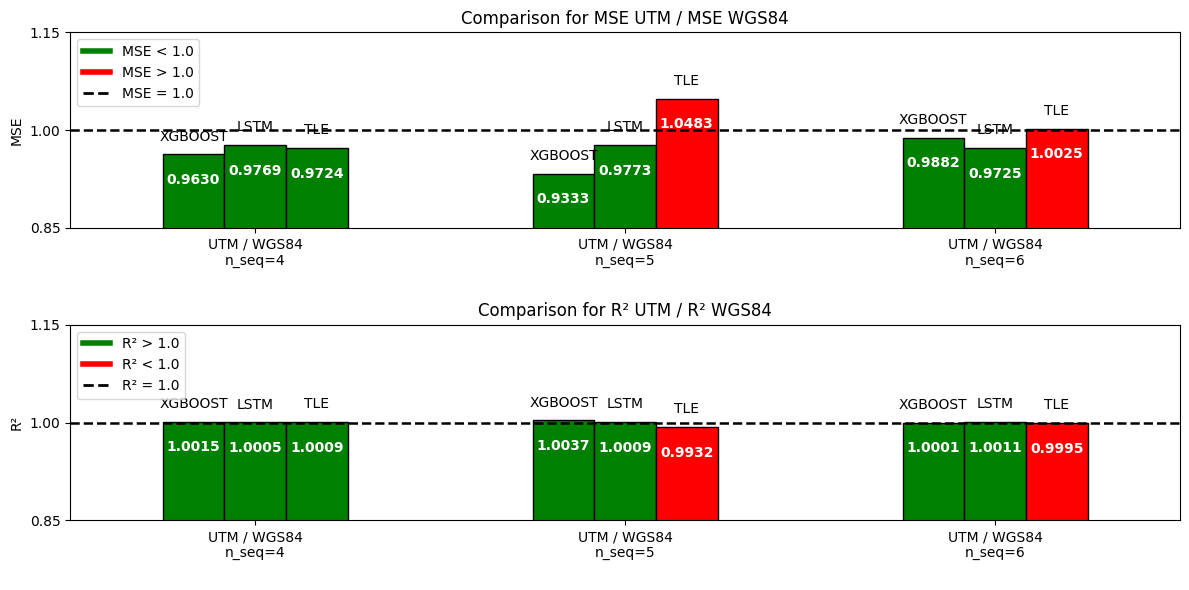

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the image
data_bar = {
    "Geolocation": ["Web Mercator / WGS84", "Web Mercator / WGS84", "Web Mercator / WGS84", 
                    "UTM / WGS84", "UTM / WGS84", "UTM / WGS84", 
                    "UTM / Web Mercator", "UTM / Web Mercator", "UTM / Web Mercator"],
    "Sequence Length": [4, 5, 6, 
                        4, 5, 6, 
                        4, 5, 6],
    "XGBOOST_MSE": [0.9940054, 1.004089101, 1.095070604, 
                    0.9630129, 0.933324058, 0.988206442, 
                    0.9688205, 0.929523144, 0.90241345],
    "XGBOOST_R2": [1.0007, 1.000159207, 0.992987037, 
                   1.0015, 1.003653375, 1.0001403, 
                   1.0008, 1.003493612, 1.007203783],
    "LSTM_MSE": [1.0036207, 1.011675811, 1.002366419, 
                 0.9769478, 0.977279649, 0.972487406, 
                 0.9734234, 0.966000805, 0.970191526],
    "LSTM_R2": [1.0001, 0.999333632, 1.000317982, 
                1.0005, 1.000851517, 1.001055716, 
                1.0005, 1.001518897, 1.000737499],
    "TLE_MSE": [1.0160543, 1.004074077, 0.998515894, 
                0.9723658, 1.04825632, 1.002465761, 
                0.9570018, 1.044002971, 1.003955738],
    "TLE_R2": [0.9989, 1.000867113, 1.000792685, 
               1.0009, 0.993223766, 0.999492128, 
               1.0021, 0.992363275, 0.998700473],
}

df_bar = pd.DataFrame(data_bar)

# Update the labels to include the sequence length with a line break
df_bar["Geolocation_Seq"] = df_bar["Geolocation"] + "\nn_seq=" + df_bar["Sequence Length"].astype(str)

# Filter data for WebMercator / LatLong
df_webmercator_latlong = df_bar[df_bar["Geolocation"] == "UTM / WGS84"]

# Function to color bars, add labels, and create a custom legend
def color_bars_with_full_legend(ax, rects, labels, values, is_mse=True):
    for rect, label, value in zip(rects, labels, values):
        height = rect.get_height()
        x_pos = rect.get_x() + rect.get_width() / 2
        color = 'green' if (value < 1.0 if is_mse else value > 1.0) else 'red'
        rect.set_facecolor(color)
        rect.set_edgecolor('black')
        ax.annotate(label, xy=(x_pos, height + 0.01), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
        ax.annotate(f"{value:.4f}", xy=(x_pos, height - 0.05), ha='center', va='bottom', fontsize=10, color='white', weight='bold')

plt.figure(figsize=(12, 6))

# MSE Bar Plot for WebMercator / LatLong
ax1 = plt.subplot(2, 1, 1)
rects1 = df_webmercator_latlong.plot(x="Geolocation_Seq", y=["XGBOOST_MSE", "LSTM_MSE", "TLE_MSE"], kind="bar", ax=ax1).patches
plt.title("Comparison for MSE UTM / MSE WGS84")
#plt.xlabel("Geolocation / Sequence Length")
plt.xlabel(" ")
plt.ylabel("MSE")
plt.ylim(0.85, 1.15)
plt.yticks(np.arange(0.85, 1.16, 0.15))
# Dashed line and corresponding label for MSE
plt.axhline(y=1.00, color='black', linewidth=1.8, linestyle='--')
plt.xticks(rotation=0)
#plt.grid(True)
plt.grid(False)  # Disable grid
color_bars_with_full_legend(ax1, rects1, ["XGBOOST"]*3 + ["LSTM"]*3 + ["TLE"]*3, df_webmercator_latlong[["XGBOOST_MSE", "LSTM_MSE", "TLE_MSE"]].values.ravel(order='F'), is_mse=True)
# Custom legend for MSE plot including the dashed line
ax1.legend(handles=[
    plt.Line2D([0], [0], color='green', lw=4, label='MSE < 1.0'),
    plt.Line2D([0], [0], color='red', lw=4, label='MSE > 1.0'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label='MSE = 1.0')
], loc='upper left')

# R² Bar Plot for WebMercator / LatLong
ax2 = plt.subplot(2, 1, 2)
rects2 = df_webmercator_latlong.plot(x="Geolocation_Seq", y=["XGBOOST_R2", "LSTM_R2", "TLE_R2"], kind="bar", ax=ax2).patches
plt.title("Comparison for R² UTM / R² WGS84")
#plt.xlabel("Geolocation / Sequence Length")
plt.xlabel(" ")
plt.ylabel("R²")
plt.ylim(0.85, 1.15)
plt.yticks(np.arange(0.85, 1.16, 0.15))
# Dashed line and corresponding label for R²
plt.axhline(y=1.00, color='black', linewidth=1.8, linestyle='--')
plt.xticks(rotation=0)
#plt.grid(True)
plt.grid(False)  # Disable grid
color_bars_with_full_legend(ax2, rects2, ["XGBOOST"]*3 + ["LSTM"]*3 + ["TLE"]*3, df_webmercator_latlong[["XGBOOST_R2", "LSTM_R2", "TLE_R2"]].values.ravel(order='F'), is_mse=False)
# Custom legend for R² plot including the dashed line
ax2.legend(handles=[
    plt.Line2D([0], [0], color='green', lw=4, label='R² > 1.0'),
    plt.Line2D([0], [0], color='red', lw=4, label='R² < 1.0'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label='R² = 1.0')
], loc='upper left')

plt.tight_layout()
plt.show()


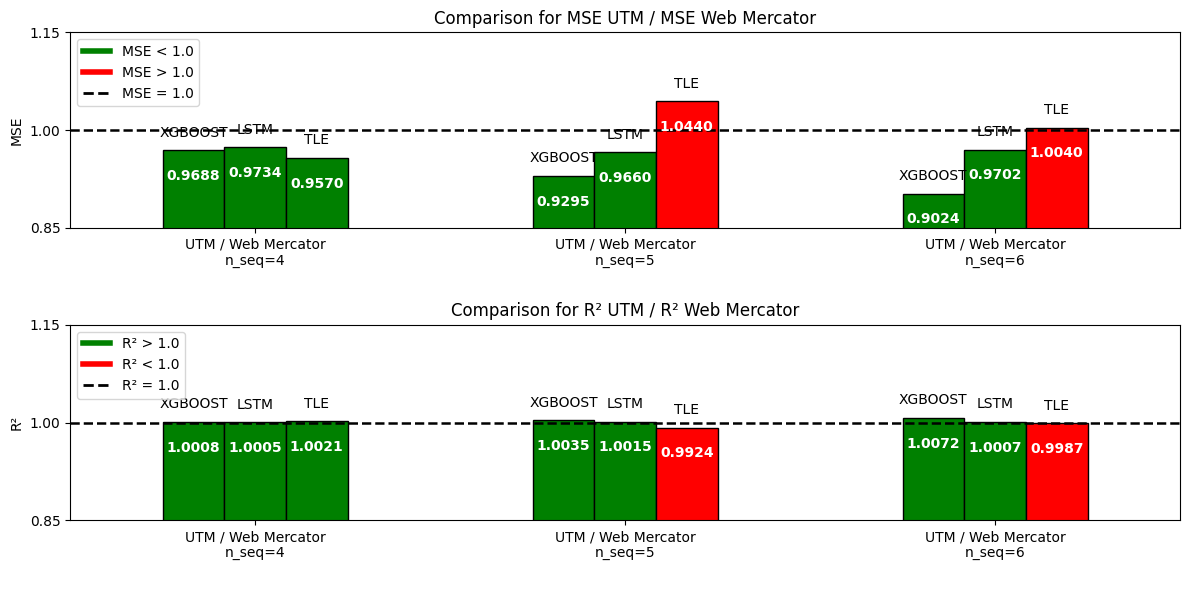

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the image
data_bar = {
    "Geolocation": ["Web Mercator / WGS84", "Web Mercator / WGS84", "Web Mercator / WGS84", 
                    "UTM / WGS84", "UTM / WGS84", "UTM / WGS84", 
                    "UTM / Web Mercator", "UTM / Web Mercator", "UTM / Web Mercator"],
    "Sequence Length": [4, 5, 6, 
                        4, 5, 6, 
                        4, 5, 6],
    "XGBOOST_MSE": [0.9940054, 1.004089101, 1.095070604, 
                    0.9630129, 0.933324058, 0.988206442, 
                    0.9688205, 0.929523144, 0.90241345],
    "XGBOOST_R2": [1.0007, 1.000159207, 0.992987037, 
                   1.0015, 1.003653375, 1.0001403, 
                   1.0008, 1.003493612, 1.007203783],
    "LSTM_MSE": [1.0036207, 1.011675811, 1.002366419, 
                 0.9769478, 0.977279649, 0.972487406, 
                 0.9734234, 0.966000805, 0.970191526],
    "LSTM_R2": [1.0001, 0.999333632, 1.000317982, 
                1.0005, 1.000851517, 1.001055716, 
                1.0005, 1.001518897, 1.000737499],
    "TLE_MSE": [1.0160543, 1.004074077, 0.998515894, 
                0.9723658, 1.04825632, 1.002465761, 
                0.9570018, 1.044002971, 1.003955738],
    "TLE_R2": [0.9989, 1.000867113, 1.000792685, 
               1.0009, 0.993223766, 0.999492128, 
               1.0021, 0.992363275, 0.998700473],
}

df_bar = pd.DataFrame(data_bar)

# Update the labels to include the sequence length with a line break
df_bar["Geolocation_Seq"] = df_bar["Geolocation"] + "\nn_seq=" + df_bar["Sequence Length"].astype(str)

# Filter data for WebMercator / LatLong
df_webmercator_latlong = df_bar[df_bar["Geolocation"] == "UTM / Web Mercator"]

# Function to color bars, add labels, and create a custom legend
def color_bars_with_full_legend(ax, rects, labels, values, is_mse=True):
    for rect, label, value in zip(rects, labels, values):
        height = rect.get_height()
        x_pos = rect.get_x() + rect.get_width() / 2
        color = 'green' if (value < 1.0 if is_mse else value > 1.0) else 'red'
        rect.set_facecolor(color)
        rect.set_edgecolor('black')
        ax.annotate(label, xy=(x_pos, height + 0.01), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
        ax.annotate(f"{value:.4f}", xy=(x_pos, height - 0.05), ha='center', va='bottom', fontsize=10, color='white', weight='bold')

plt.figure(figsize=(12, 6))

# MSE Bar Plot for WebMercator / LatLong
ax1 = plt.subplot(2, 1, 1)
rects1 = df_webmercator_latlong.plot(x="Geolocation_Seq", y=["XGBOOST_MSE", "LSTM_MSE", "TLE_MSE"], kind="bar", ax=ax1).patches
plt.title("Comparison for MSE UTM / MSE Web Mercator")
#plt.xlabel("Geolocation / Sequence Length")
plt.xlabel(" ")
plt.ylabel("MSE")
plt.ylim(0.85, 1.15)
plt.yticks(np.arange(0.85, 1.16, 0.15))
# Dashed line and corresponding label for MSE
plt.axhline(y=1.00, color='black', linewidth=1.8, linestyle='--')
plt.xticks(rotation=0)
#plt.grid(True)
plt.grid(False)  # Disable grid
color_bars_with_full_legend(ax1, rects1, ["XGBOOST"]*3 + ["LSTM"]*3 + ["TLE"]*3, df_webmercator_latlong[["XGBOOST_MSE", "LSTM_MSE", "TLE_MSE"]].values.ravel(order='F'), is_mse=True)
# Custom legend for MSE plot including the dashed line
ax1.legend(handles=[
    plt.Line2D([0], [0], color='green', lw=4, label='MSE < 1.0'),
    plt.Line2D([0], [0], color='red', lw=4, label='MSE > 1.0'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label='MSE = 1.0')
], loc='upper left')

# R² Bar Plot for WebMercator / LatLong
ax2 = plt.subplot(2, 1, 2)
rects2 = df_webmercator_latlong.plot(x="Geolocation_Seq", y=["XGBOOST_R2", "LSTM_R2", "TLE_R2"], kind="bar", ax=ax2).patches
plt.title("Comparison for R² UTM / R² Web Mercator")
#plt.xlabel("Geolocation / Sequence Length")
plt.xlabel(" ")
plt.ylabel("R²")
plt.ylim(0.85, 1.15)
plt.yticks(np.arange(0.85, 1.16, 0.15))
# Dashed line and corresponding label for R²
plt.axhline(y=1.00, color='black', linewidth=1.8, linestyle='--')
plt.xticks(rotation=0)
#plt.grid(True)
plt.grid(False)  # Disable grid
color_bars_with_full_legend(ax2, rects2, ["XGBOOST"]*3 + ["LSTM"]*3 + ["TLE"]*3, df_webmercator_latlong[["XGBOOST_R2", "LSTM_R2", "TLE_R2"]].values.ravel(order='F'), is_mse=False)
# Custom legend for R² plot including the dashed line
ax2.legend(handles=[
    plt.Line2D([0], [0], color='green', lw=4, label='R² > 1.0'),
    plt.Line2D([0], [0], color='red', lw=4, label='R² < 1.0'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label='R² = 1.0')
], loc='upper left')

plt.tight_layout()
plt.show()


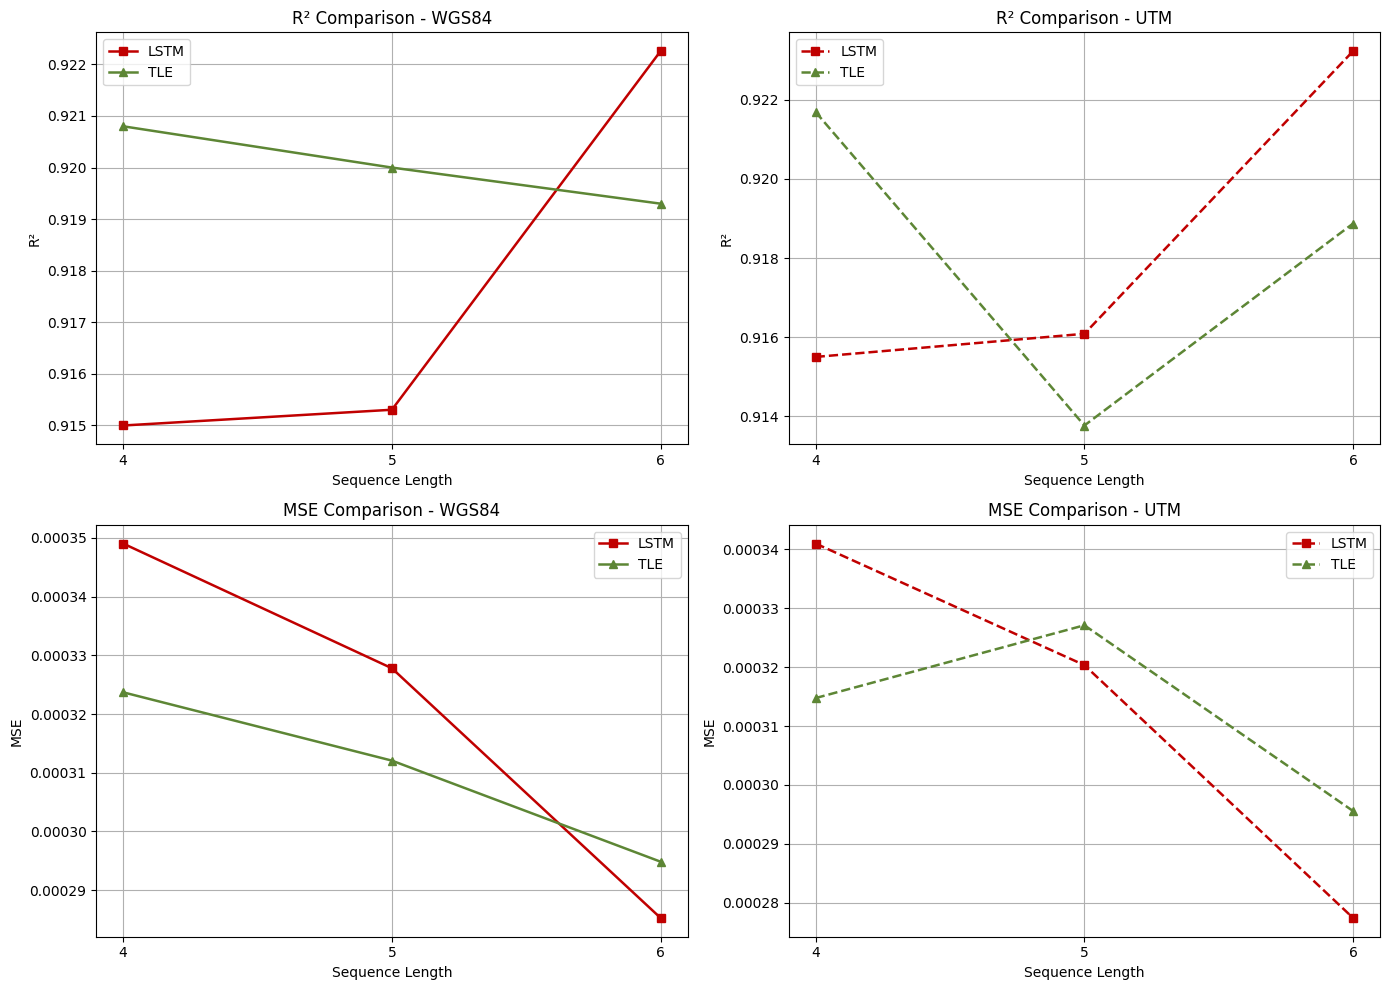

In [51]:
import matplotlib.pyplot as plt

'''# Provided R² values for LatLong and UTM
latlong_r2_lstm = [0.915305336, 0.922258426]
latlong_r2_tle = [0.9200, 0.9193]
utm_r2_lstm = [0.916084734, 0.923232069]
utm_r2_tle = [0.91376632, 0.918872663]

# Provided MSE values for LatLong and UTM
latlong_mse_lstm = [0.000327796, 0.000285243]
latlong_mse_tle = [0.00031206, 0.000294832]
utm_mse_lstm = [0.000320348, 0.000277395]
utm_mse_tle = [0.000327119, 0.000295559]
'''

# Provided R² values for LatLong and UTM
latlong_r2_lstm = [0.9150, 0.915305336, 0.922258426]
latlong_r2_tle = [0.9208, 0.9200, 0.9193]
utm_r2_lstm = [0.9155, 0.916084734, 0.923232069]
utm_r2_tle = [0.92169, 0.91376632, 0.918872663]

# Provided MSE values for LatLong and UTM
latlong_mse_lstm = [0.000349045, 0.000327796, 0.000285243]
latlong_mse_tle = [0.0003236998, 0.00031206, 0.000294832]
utm_mse_lstm = [0.00034099895856, 0.000320348, 0.000277395]
utm_mse_tle = [0.0003147546, 0.000327119, 0.000295559]

#color_lstm = '#3274A1'
#color_tle = '#E1812C'

color_lstm = '#C00000'  # Blue from the bar chart
color_tle = '#5D8635'   # Orange from the bar chart
#royal_purple = '#9900CC'    # Selected Royal Purple

# Plotting R² and MSE values for LatLong and UTM in a single figure with 4 subplots
plt.figure(figsize=(14, 10))

# LatLong R² Chart
plt.subplot(2, 2, 1)
plt.plot([4, 5, 6], latlong_r2_lstm, marker='s', linestyle='-', color=color_lstm, label='LSTM', linewidth=1.8)
plt.plot([4, 5, 6], latlong_r2_tle, marker='^', linestyle='-', color=color_tle, label='TLE', linewidth=1.8)
plt.title('R² Comparison - WGS84')
plt.xlabel('Sequence Length')
plt.ylabel('R²')
plt.xticks([4, 5, 6])
plt.legend()
plt.grid(True)

# UTM R² Chart
plt.subplot(2, 2, 2)
plt.plot([4, 5, 6], utm_r2_lstm, marker='s', linestyle='--', color=color_lstm, label='LSTM', linewidth=1.8)
plt.plot([4, 5, 6], utm_r2_tle, marker='^', linestyle='--', color=color_tle, label='TLE', linewidth=1.8)
plt.title('R² Comparison - UTM')
plt.xlabel('Sequence Length')
plt.ylabel('R²')
plt.xticks([4, 5, 6])
plt.legend()
plt.grid(True)

# LatLong MSE Chart
plt.subplot(2, 2, 3)
plt.plot([4, 5, 6], latlong_mse_lstm, marker='s', linestyle='-', color=color_lstm, label='LSTM', linewidth=1.8)
plt.plot([4, 5, 6], latlong_mse_tle, marker='^', linestyle='-', color=color_tle, label='TLE', linewidth=1.8)
plt.title('MSE Comparison - WGS84')
plt.xlabel('Sequence Length')
plt.ylabel('MSE')
plt.xticks([4, 5, 6])
plt.legend()
plt.grid(True)

# UTM MSE Chart
plt.subplot(2, 2, 4)
plt.plot([4, 5, 6], utm_mse_lstm, marker='s', linestyle='--', color=color_lstm, label='LSTM', linewidth=1.8)
plt.plot([4, 5, 6], utm_mse_tle, marker='^', linestyle='--', color=color_tle, label='TLE', linewidth=1.8)
plt.title('MSE Comparison - UTM')
plt.xlabel('Sequence Length')
plt.ylabel('MSE')
plt.xticks([4, 5, 6])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Fim.